# 1. import relevant libraries

In [8]:
import pandas as pd
import numpy as np
import sys
import plot_utils
import matplotlib.pyplot as plt
import matplotlib.ticker as pltTicker
import seaborn as sns

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [9]:
def get_df_and_colNames_dict_and_summary_dict_tmp(dataset, loss, package, fold, lambda0, lambda2, folder, printLatex=False):
    df_fileName = folder + "{}.txt".format(dataset)
    df = plot_utils.read_into_df(df_fileName)
    coef_fileName = folder + "{}.txt_{} {}_{}_{}_{}_coeff".format(dataset, package, loss, fold, lambda0, lambda2)
    index_fileName = folder + "{}.txt_{} {}_{}_{}_{}_index".format(dataset, package, loss, fold, lambda0, lambda2)
    coeffs, intercept, indices = plot_utils.get_coeffs_and_indices_from_fileName(coef_fileName, index_fileName)

    colNames = plot_utils.read_csv_columns("{}_bin.csv".format(dataset))
    colNames_dict = plot_utils.extract_key_and_values_from_colNames(colNames)
    if printLatex:
        plot_utils.print_coeffs_and_thresholds(indices, coeffs, colNames)

    summary_dict_tmp = plot_utils.print_thresholds_in_LaTex(intercept, indices, coeffs, colNames, printLatex=printLatex)
    return df, colNames_dict, summary_dict_tmp

def get_metrics(df, package, loss, lambda0, lambda2):
    condition_dict = {"algorithm": package+' '+loss, "lamb": lambda0, "g": lambda2}
    tmpCV_df = plot_utils.extract_df(df, condition_dict)
    tmpfold_df = plot_utils.extract_df(tmpCV_df, {"fold": float(fold)})

    metrics = ["train_auc", "test_auc", "train_acc", "test_acc", "train_duration", "support_size"]
    for metric in metrics:
        print(metric, ":", list(tmpfold_df[metric])[0])
    print("\n")

    for metric in metrics:
        print(metric, ":", plot_utils.get_avg_of_list(list(tmpCV_df[metric])), "+/-", plot_utils.get_std_of_list(list(tmpCV_df[metric])))
    print("\n\n")
    
def plot_step_function(summary_dict_tmp, colNames_dict, fontsize=55, labelsize=45, marginsize=5.0, figsizeRatio=0.618, stepLineWidth=8.0):
    fontsize = fontsize
    labelsize = labelsize
    figsize = 8 # 7.6
    figsizeRatio = figsizeRatio

    summary_dict = plot_utils.fix_irregular_keys(summary_dict_tmp)

    n = len(summary_dict.keys())
    fig, ax_list = plt.subplots((n+1)//2, 2, figsize=(((n+1)//2)*figsize, ((n+1)//2)*figsize*figsizeRatio), tight_layout=True, linewidth=1000.0)

    i_y = 0
    for i, key in enumerate(summary_dict.keys()):
        i_x, i_y = i//2, i%2        
        plot_utils.plot_continuous_thresholds(ax_list[i_x][i_y], summary_dict, colNames_dict, key, ylim="autoMargin", fontsize=fontsize, labelsize=labelsize, print_threshold_pairs=False, marginsize=marginsize, stepLineWidth=stepLineWidth)
    if i_y == 0:
        ax_list[-1][1].set_axis_off()
    return fig, ax_list



lambda0: 5, fold: 2
The colName 'RiskPerformance' is ignored
train_auc : 0.799507943739854
test_auc : 0.804331472300222
train_acc : 0.727261862077208
test_acc : 0.731835564053537
train_duration : 3.14869904518127
support_size : 19


train_auc : 0.8023124537053181 +/- 0.0025138262561014433
test_auc : 0.79100492700049 +/- 0.010431437699567779
train_acc : 0.7286069470543592 +/- 0.0025034001186889283
test_acc : 0.7228226131659586 +/- 0.011207849602835596
train_duration : 2.8483371734619123 +/- 0.23365083838684073
support_size : 20.6 +/- 1.0198039027185568





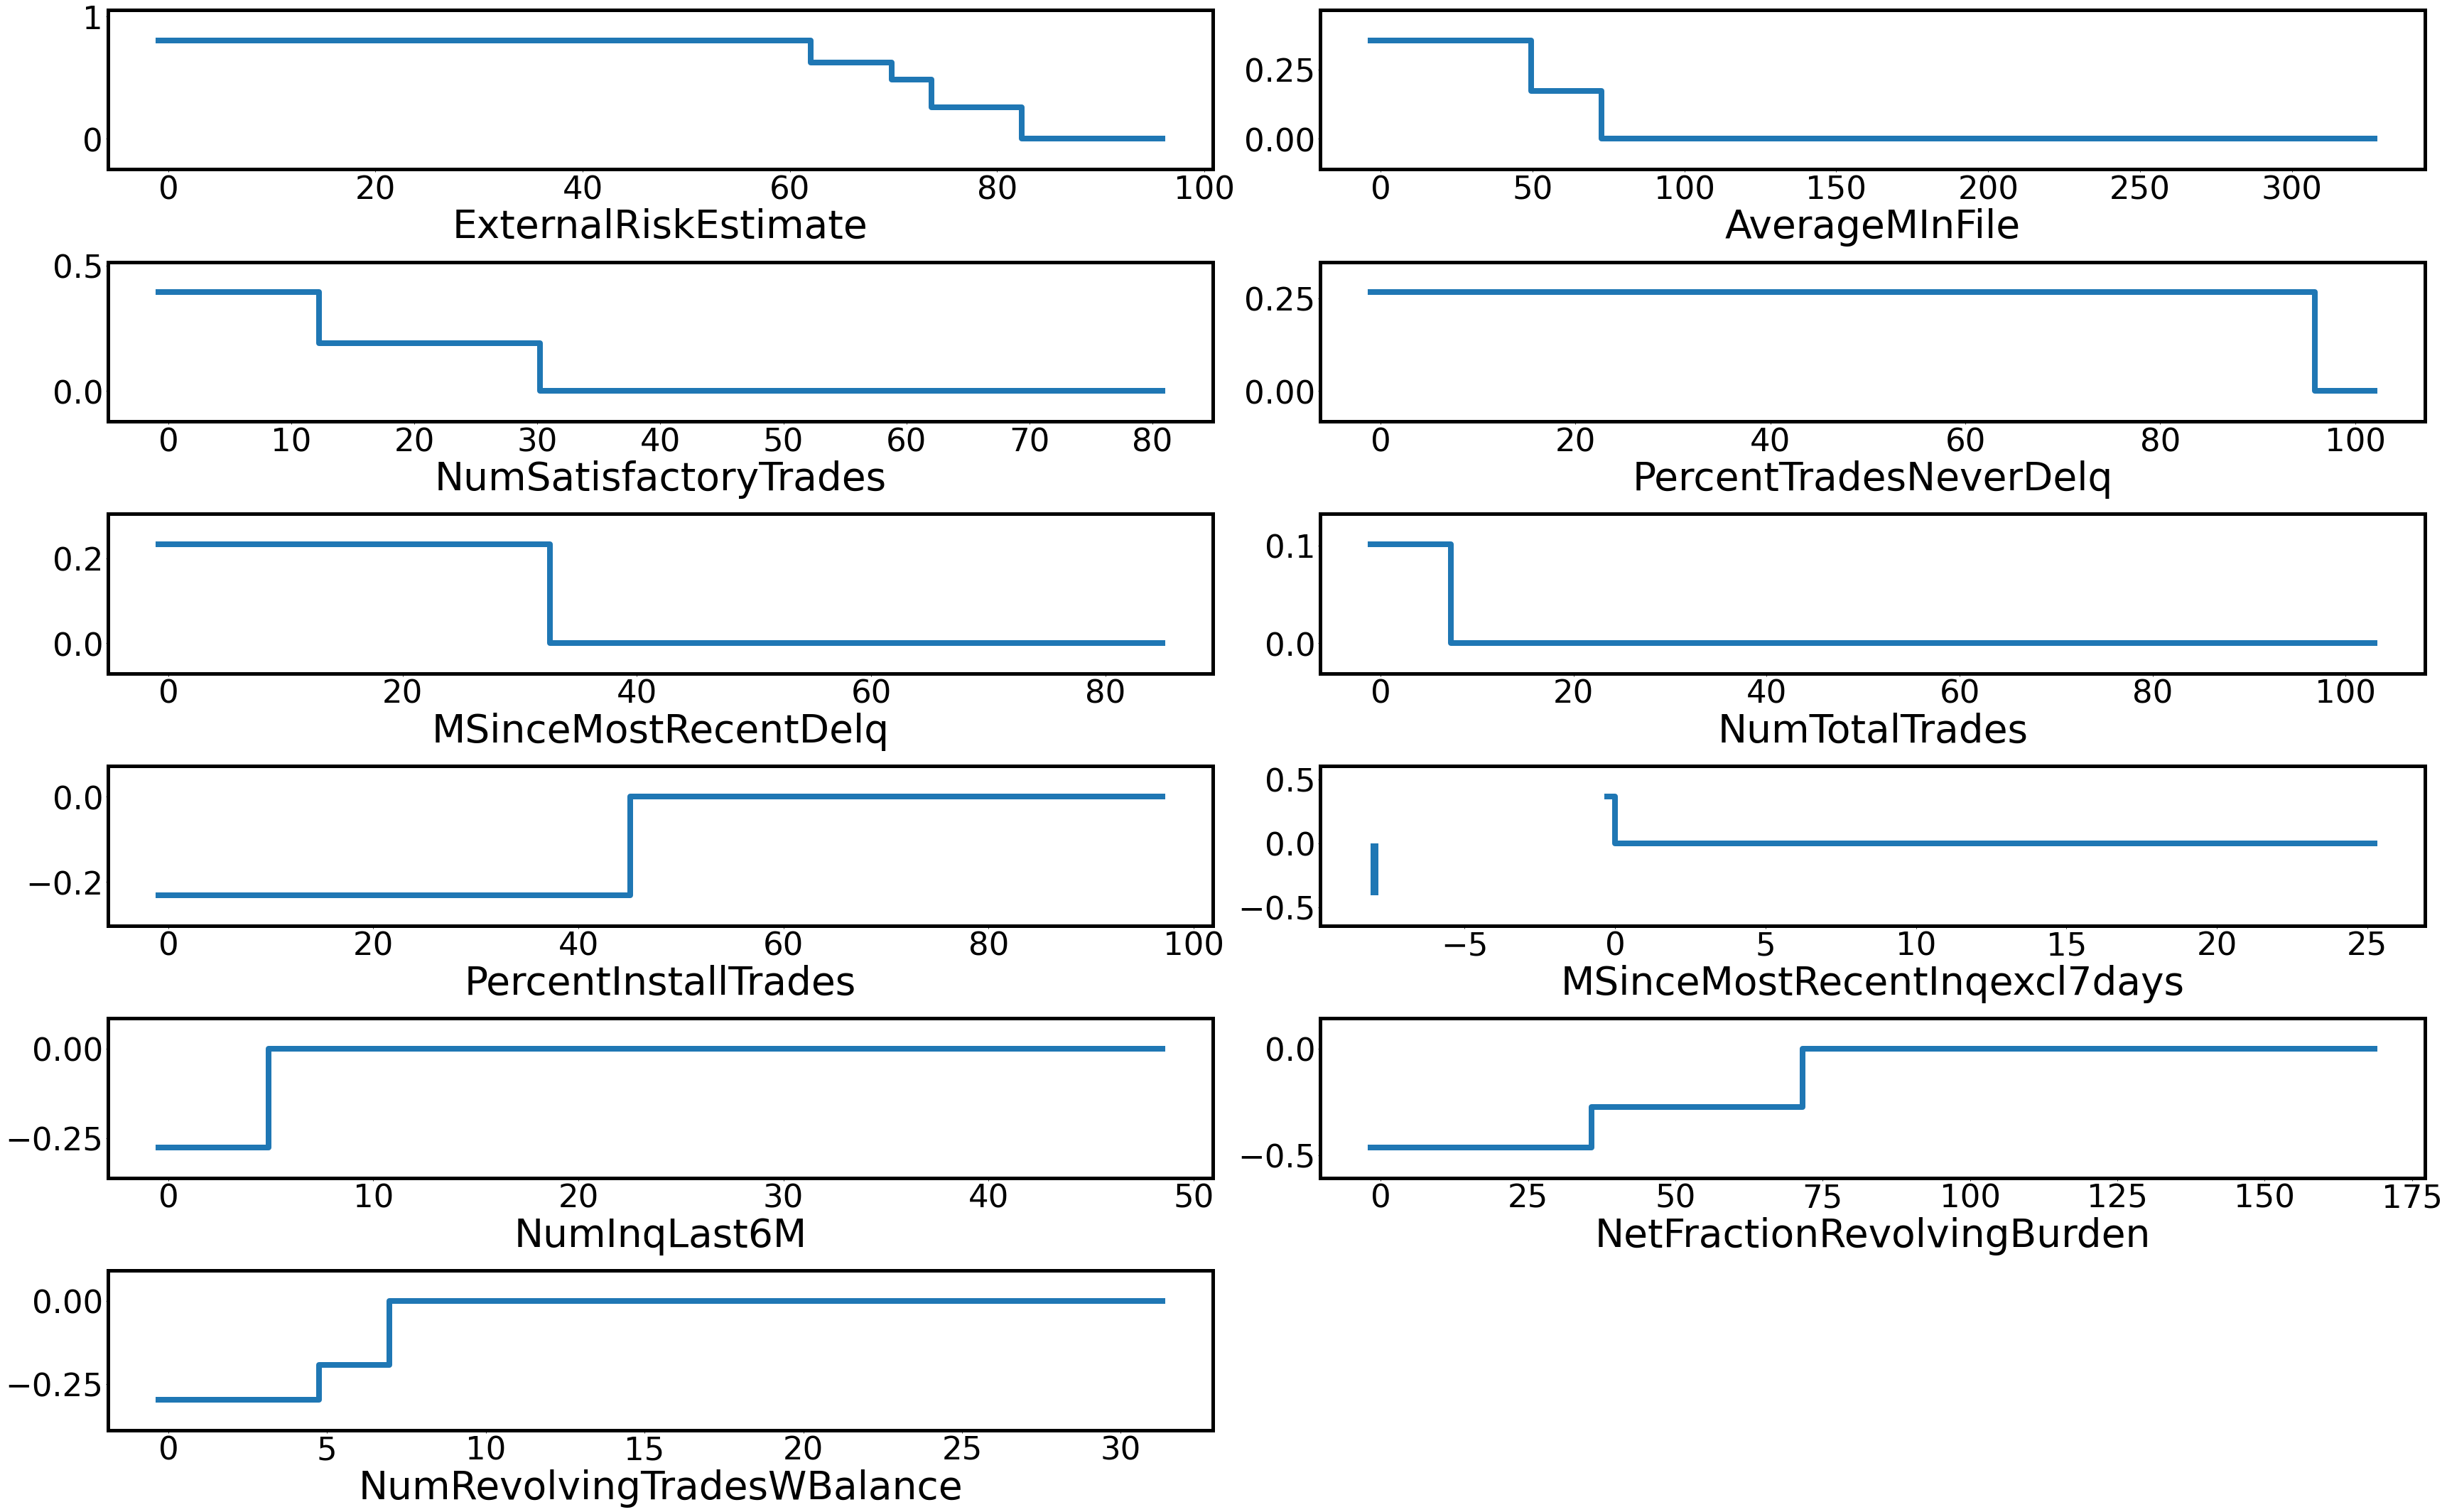

In [10]:
dataset = "fico"
loss = "Exponential"
package = "fastsparse"
lambda2 = 0.001
folder = "results_02_18_2022_time/"

folds = [2]
lambda0s = [5]

for lambda0 in lambda0s:
    for fold in folds:
        print("lambda0: {}, fold: {}".format(lambda0, fold))
        df, colNames_dict, summary_dict_tmp = get_df_and_colNames_dict_and_summary_dict_tmp(dataset, loss, package, fold, lambda0, lambda2, folder, printLatex=False)
        get_metrics(df, package, loss, lambda0, lambda2)
        fig, ax_list = plot_step_function(summary_dict_tmp, colNames_dict)

lambda0: 5, fold: 2
The colName 'RiskPerformance' is ignored
train_auc : 0.800105961603558
test_auc : 0.799878612378612
train_acc : 0.72534958766583
test_acc : 0.733269598470363
train_duration : 5.94694375991821
support_size : 18


train_auc : 0.8022758762548208 +/- 0.0027409169661202163
test_auc : 0.7922591377425816 +/- 0.009832678089327952
train_acc : 0.7298977294255108 +/- 0.004227442664071222
test_acc : 0.7244484465427267 +/- 0.01258186148174392
train_duration : 5.136786699295044 +/- 0.5367968154092281
support_size : 17.8 +/- 0.39999999999999997





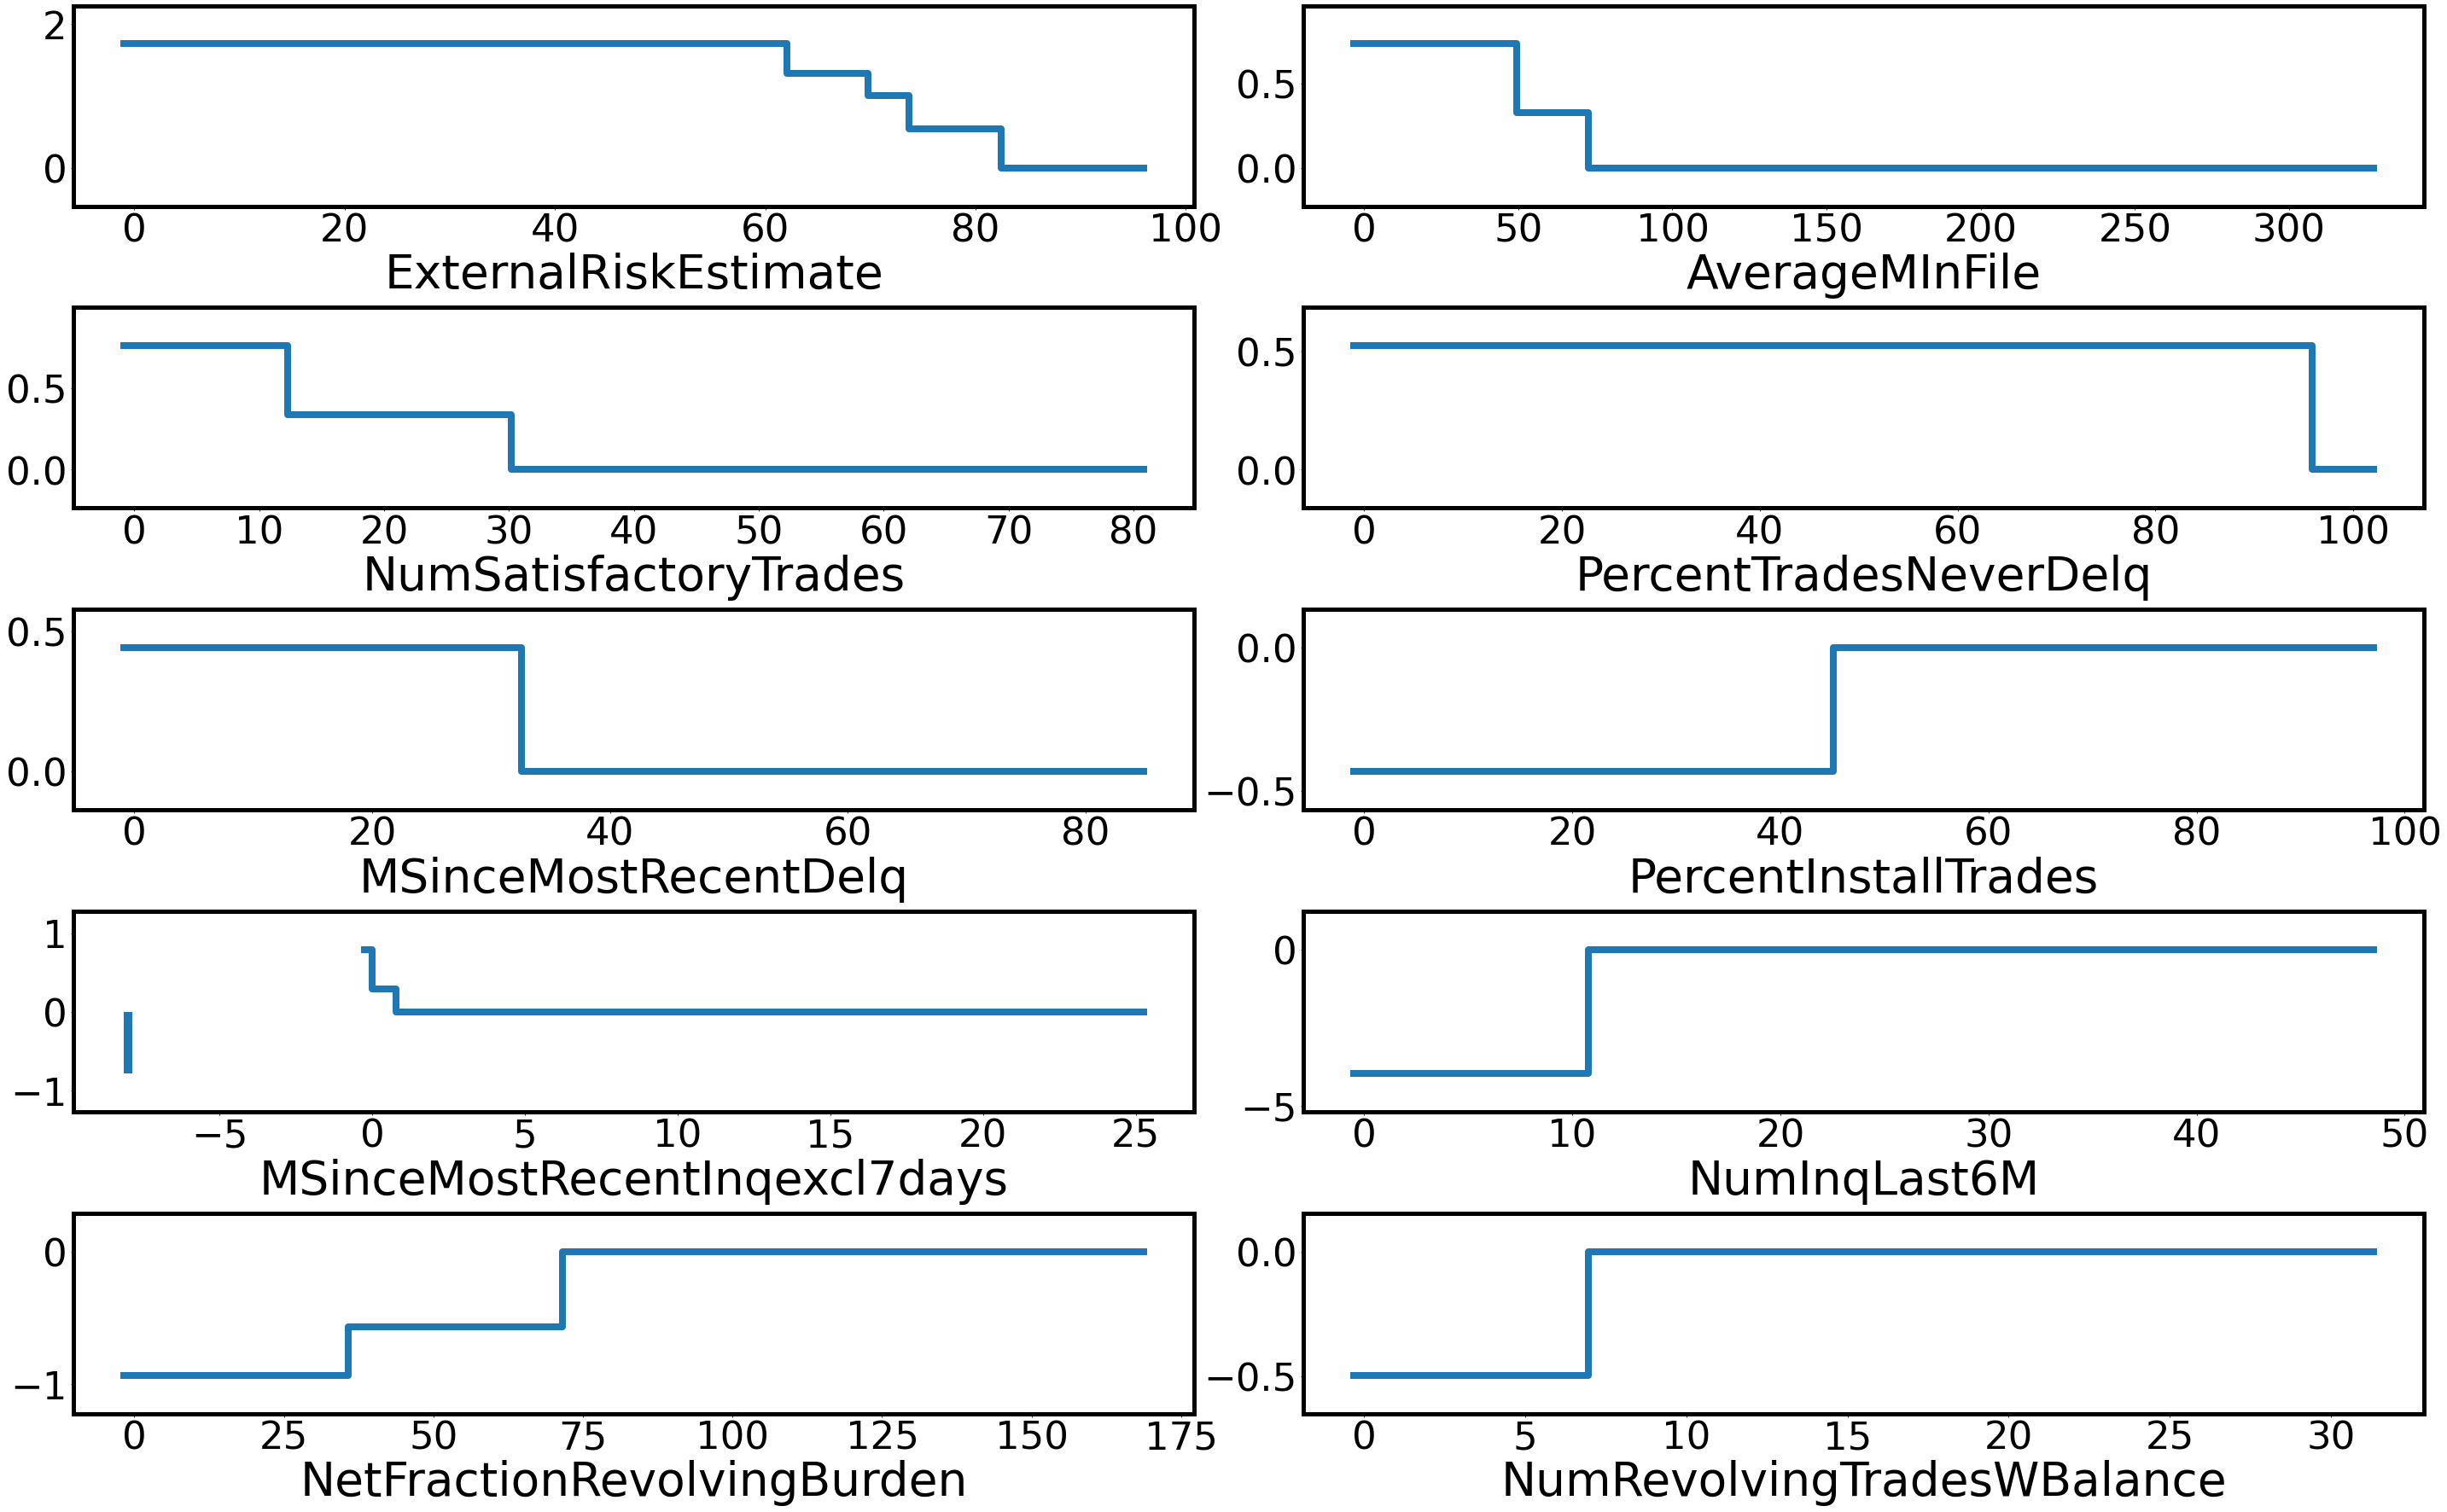

In [11]:
dataset = "fico"
loss = "Logistic"
package = "fastsparse"
lambda2 = 0.001
folder = "results_02_18_2022_time/"

folds = [2]
lambda0s = [5]

for lambda0 in lambda0s:
    for fold in folds:
        print("lambda0: {}, fold: {}".format(lambda0, fold))
        df, colNames_dict, summary_dict_tmp = get_df_and_colNames_dict_and_summary_dict_tmp(dataset, loss, package, fold, lambda0, lambda2, folder, printLatex=False)
        get_metrics(df, package, loss, lambda0, lambda2)
        fig, ax_list = plot_step_function(summary_dict_tmp, colNames_dict)